In [ ]:
# Dependencies
import requests
import json
import pandas as pd

# Google developer API key
from config import gkey,gkey_places

file_one = "USCBootcamp_FirstProject/Raw_Data/LA_cities_Lat_lng_codes_data.csv"
cities_df = pd.read_csv(file_one, encoding = "ISO-8859-1")

cities_df.head()
file_one_df=cities_df[:]

In [22]:
file_one_df.head()

,address,lat,lng,northeast_Lat,northeast_Lng,southwest_Lat,southwest_Lng
0,Los Angeles,34.052234,-118.243685,34.337306,-118.155289,33.703652,-118.668176
1,Long Beach,33.770050,-118.193740,33.885459,-118.063253,33.714957,-118.248966
2,Glendale,34.142508,-118.255075,34.267232,-118.182005,34.118761,-118.307849
3,Lancaster,40.037875,-76.305514,40.073041,-76.254084,40.006910,-76.346614
4,Palmdale,34.579434,-118.116461,34.661043,-117.915747,34.509813,-118.287107


In [ ]:
# Create an empty column for bank count
cities_df["airport"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in file_one_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 3000
    target_type = "airport"
    #target_keyword ="airport"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    airport_data = response.json()

    #print(json.dumps(airport_data, indent=4, sort_keys=True))

    counter = 0
    for airport in airport_data["results"]:
        #print(airport["name"])
        #print(airport["vicinity"])
        #print(airport["name"].upper().find("AIRPORT"))
        
        if airport["name"].upper().find("AIRPORT")>0:
            counter += 1
            
        
    cities_df.set_value(index,"airport",counter)

In [23]:
cities_dfa['Airport2']=cities_df[['airport']]
cities_dfa['City']=cities_df[['address']]

C:\Users\lindsay.yan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lindsay.yan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
# Create an empty column for bank count
cities_df["public_transportation"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in file_one_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 3000
    target_type = ["light_rail_station",
                "transit_station","subway_station"]
    #target_keyword ="bank"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    train_data = response.json()

    #print(json.dumps(train_data, indent=4, sort_keys=True))

    counter = 0
    for train in train_data["results"]:
        #print(train["name"])
        #print(train["vicinity"])
        counter += 1
        
    cities_df.set_value(index,"public_transportation",counter)

In [25]:
# Create an empty column for bank count
cities_df["park"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in file_one_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 3000
    target_type = "park"
    #target_keyword ="bank"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    park_data = response.json()

    #print(json.dumps(park_data, indent=4, sort_keys=True))

    counter = 0
    for park in park_data["results"]:
        #print(park["name"])
        #print(park["vicinity"])
        #print(park["rating"])
        #if park["rating"]>3:
        counter += 1
                
    cities_df.set_value(index,"park",counter)

In [26]:
# Create an empty column for bank count
cities_df["shopping_mall"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in file_one_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 3000
    target_type = "shopping_mall"
    #target_keyword ="bank"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    shopping_mall_data = response.json()

    #print(json.dumps(shopping_mall_data, indent=4, sort_keys=True))

    counter = 0
    for shopping_mall in shopping_mall_data["results"]:
        #print(shopping_mall["name"])
        #print(shopping_mall["vicinity"])
        #print(shopping_mall["rating"])
        
        try:
            if shopping_mall["rating"]>4:
                counter += 1
        except KeyError:
            continue
        
                
    cities_df.set_value(index,"shopping_mall",counter)
    

In [27]:
# Visualize the DataFrame
cities_df.head()

,address,lat,lng,northeast_Lat,northeast_Lng,southwest_Lat,southwest_Lng,airport,public_transportation,park,shopping_mall
0,Los Angeles,34.052234,-118.243685,34.337306,-118.155289,33.703652,-118.668176,0,7,17,12
1,Long Beach,33.770050,-118.193740,33.885459,-118.063253,33.714957,-118.248966,0,6,16,8
2,Glendale,34.142508,-118.255075,34.267232,-118.182005,34.118761,-118.307849,0,0,19,11
3,Lancaster,40.037875,-76.305514,40.073041,-76.254084,40.006910,-76.346614,0,0,20,5
4,Palmdale,34.579434,-118.116461,34.661043,-117.915747,34.509813,-118.287107,0,0,9,2


In [36]:
cities_dfb=cities_df[['City','public_transportation','park','shopping_mall','airport']]

In [54]:
cities_dfb.head()

,City,public_transportation,park,shopping_mall,airport
0,Los Angeles,7,17,12,0
1,Long Beach,6,16,8,0
2,Glendale,0,19,11,0
3,Lancaster,0,20,5,0
4,Palmdale,0,9,2,0
5,Santa Clarita,0,15,9,0
6,Pomona,0,20,2,0
7,Torrance,0,18,10,0
8,Pasadena,5,16,11,0
9,Inglewood,0,20,5,1


In [94]:
##Unpivot data for Seaborn plots
cities_dfc=pd.melt(cities_dfb, id_vars=['City'], value_vars=['public_transportation', 'park','shopping_mall','airport'])

In [99]:
cities=cities_dfb[['City']]

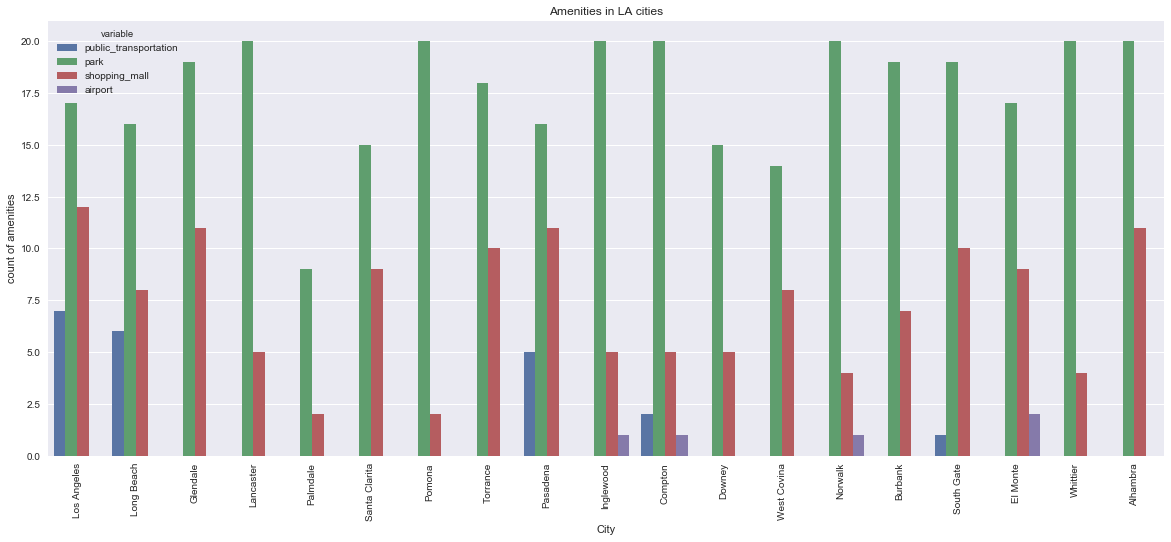

In [206]:
import seaborn as sns
plt.figure(figsize=(20,8))
sns.barplot(x='City', y='value', hue='variable', data=cities_dfc)
plt.xticks(rotation=90)

plt.ylabel('count of amenities')
plt.title('Amenities in LA cities')
plt.show()

In [208]:
plt.savefig('Amenities in LA cites.png')